## Annals of Dagobah
An analysis of a Star Wars Survey

/anaconda3/envs/PythonData=3.6/lib/python3.6/site-packages/ipykernel/__main__.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda3/envs/PythonData=3.6/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/envs/PythonData=3.6/lib/python3.6/site-packages/ipykernel/__main__.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

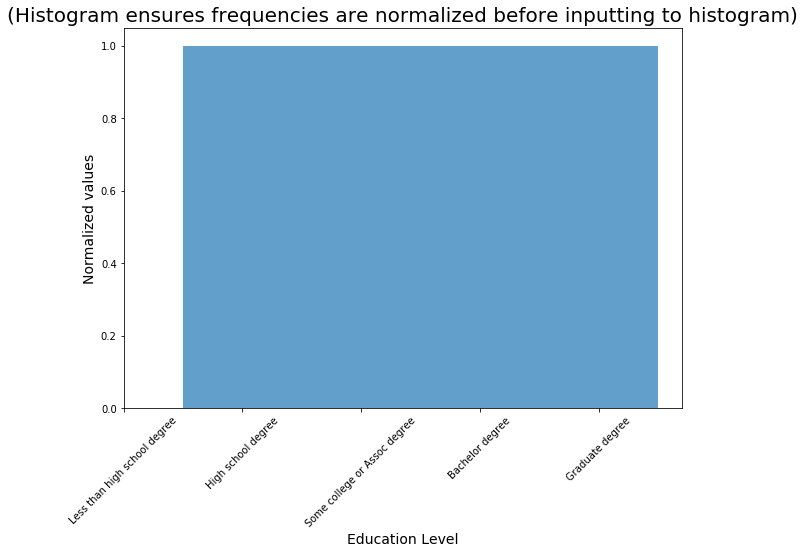

In [13]:
#This is the primary Coding module for the project \"The Annals of Dagobah\" by the group The Data Swamp Sages of Dagobah.\n",
   
%matplotlib inline
   
# Dependencies and Setup\
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
 
# File to Load ",
path_StarWars = "Resources/StarWars.csv"
    
df_StarWars = pd.read_csv(path_StarWars, encoding='iso8859_2')
    
#Generate and Normalize Total Population Histogram
#-------------------------------------

df_NoNull = df_StarWars.dropna(subset=['Education','StarTrek_Fan', 'SW_Fan'])
df_NoNull.head()
df_SW_cln = df_NoNull

NoNull_edu_grpd = df_NoNull.groupby('Education')['SW_Fan'].count()
df_NoNull_edu_grpd = pd.DataFrame(NoNull_edu_grpd)
#print(df_NoNull_edu_grpd)

dict_freq = {}
ser_index = df_NoNull_edu_grpd.index.get_values()

ctr = 0
for index in ser_index:
    dict_freq[index] = df_NoNull_edu_grpd.iloc[ctr,0]
    ctr += 1
       
# normalizes frequencies for histogram
df_SW_cln['Score_Weight']=df_SW_cln['Education']

df_SW_cln['Score_Weight'].replace(to_replace='Less than high school degree',value=(1/dict_freq['Less than high school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='High school degree',value=(1/dict_freq['High school degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Some college or Associate degree',value=(1/dict_freq['Some college or Associate degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Bachelor degree',value=(1/dict_freq['Bachelor degree']),inplace=True)
df_SW_cln['Score_Weight'].replace(to_replace='Graduate degree',value=(1/dict_freq['Graduate degree']),inplace=True)
ser_ScoreWeight = df_SW_cln['Score_Weight']

#print(ser_EduScore)
#print(df_SW_cln)

df_SW_cln['Education_Score']=df_SW_cln['Education']

df_SW_cln['Education_Score'].replace(to_replace='Less than high school degree',value=1,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='High school degree',value=2,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Some college or Associate degree',value=3,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Bachelor degree',value=4,inplace=True)
df_SW_cln['Education_Score'].replace(to_replace='Graduate degree',value=5,inplace=True)
ser_EduScore = df_SW_cln['Education_Score']




bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data

plt.figure(figsize=(10,7))
plt.title("(Histogram ensures frequencies are normalized before inputting to histogram)", fontsize=20)
plt.subplot()
plt.hist(ser_EduScore, bins=5, density=False, weights=ser_ScoreWeight, alpha=0.7, label="Education Level")
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Normalized values", fontsize=14)
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()

#print(df_StarWars_Yes_NoNull)




411


/anaconda3/envs/PythonData=3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


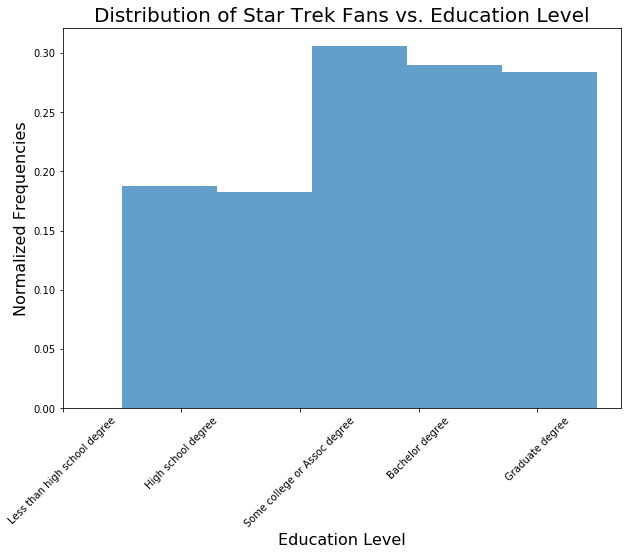

In [15]:
#Generate Star Treck fans from Star Wars fan population Histogram
#---------------------------------------------------------------- 

df_ST_Yes = df_SW_cln.loc[(df_SW_cln['StarTrek_Fan']=='Yes')]
print(len(df_ST_Yes))

ser_EduScore2 = df_ST_Yes['Education_Score']
ser_EduWeight2 = df_ST_Yes['Score_Weight']

bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data
plt.figure(figsize=(10,7))
plt.title("Distribution of Star Trek Fans vs. Education Level", fontsize=20)
plt.xlabel("Education Level", fontsize=16)
plt.ylabel("Normalized Frequencies", fontsize=16)
plt.subplot()
plt.hist(ser_EduScore2, bins=5, density=True, weights=ser_EduWeight2, alpha=0.7, label="Education Level")
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()

539
367


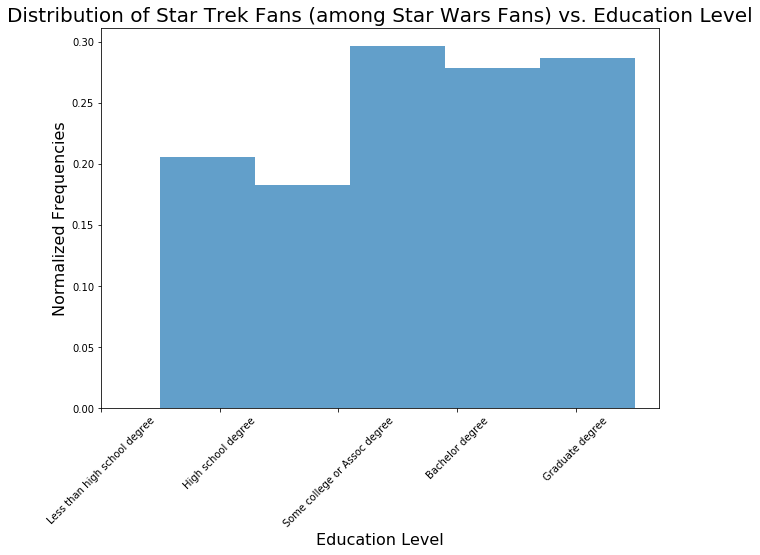

In [16]:
#Generate Star Treck fans from Staw Wars fan population Histogram
#----------------------------------------------------------------   
df_SW_Yes = df_SW_cln.loc[(df_SW_cln['SW_Fan']=='Yes')]
print(len(df_SW_Yes))

df_SW_Yes_ST_Yes = df_SW_Yes.loc[(df_SW_Yes['StarTrek_Fan']=='Yes')]
print(len(df_SW_Yes_ST_Yes))

#df_SWST_NoNull = df_SW_Yes_ST_Yes.dropna(subset=['Education','StarTrek_Fan'])
#df_SWST_NoNull.head()

#ser_EduScore3 = df_SWST_NoNull['Education_Score']
#ser_EduWeight3 = df_SWST_NoNull['Score_Weight']

ser_EduScore3 = df_SW_Yes_ST_Yes['Education_Score']
ser_EduWeight3 = df_SW_Yes_ST_Yes['Score_Weight']


bin_labels = ['Less than high school degree','High school degree','Some college or Assoc degree','Bachelor degree','Graduate degree']


# Histogram Plot of Data
plt.figure(figsize=(10,7))
plt.title("Distribution of Star Trek Fans (among Star Wars Fans) vs. Education Level", fontsize=20)
plt.xlabel("Education Level", fontsize=16)
plt.ylabel("Normalized Frequencies", fontsize=16)
plt.hist(ser_EduScore3, bins=5, density=True, weights=ser_EduWeight3, alpha=0.7, label="Education Level")
#x,labels=plt.xticks()
#print(x)
#print(labels)

plt.xticks([0.5,1.5,2.5,3.5,4.5],bin_labels,rotation=45)
#plt.xticks(label=bin_labels)
plt.show()



In [29]:
# Create a Contingency table to caclulate correct, Expected distribution for Chi Square test between two 
# observation distributions.
#-----------------------------------------------------------------------------------------------------------------

#df_ST_Yes['Weighted_Edu_Score'] = df_ST_Yes['Education_Score'] * df_ST_Yes['Score_Weight']

#df_SW_Yes_ST_Yes['Weighted_Edu_Score'] = df_SW_Yes_ST_Yes['Education_Score'] * df_SW_Yes_ST_Yes['Score_Weight']



#NoNull_edu_grpd = df_NoNull.groupby('Education')['SW_Fan'].count()
ST_Yes_edu_grpd = df_ST_Yes.groupby('Education')['SW_Fan'].count()
df_ST_Yes_edu_grpd = pd.DataFrame(ST_Yes_edu_grpd)
#print(df_ST_Yes_edu_grpd)

SW_Yes_ST_Yes_grpd = df_SW_Yes_ST_Yes.groupby('Education')['SW_Fan'].count()
df_SW_Yes_ST_Yes_grpd = pd.DataFrame(SW_Yes_ST_Yes_grpd)
#print(df_SW_Yes_ST_Yes_grpd)

df_combo = df_ST_Yes_edu_grpd.merge(right=df_SW_Yes_ST_Yes_grpd,how='inner', on='Education')
 
#print(df_combo.head())
df_combo.rename(columns={'SW_Fan_x': 'SW_&_NonSW_Fans', 'SW_Fan_y': 'SW_Fans'},inplace='true')

df_combo_T1 = df_combo.T


df_combo_T1['Less than high school degree'] = df_combo_T1['Less than high school degree'] * (1/dict_freq['Less than high school degree'])
df_combo_T1['High school degree'] = df_combo_T1['High school degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Some college or Associate degree'] = df_combo_T1['Some college or Associate degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Bachelor degree'] = df_combo_T1['Bachelor degree'] * (1/dict_freq['High school degree'])
df_combo_T1['Graduate degree'] = df_combo_T1['Graduate degree'] * (1/dict_freq['High school degree'])

df_combo = df_combo_T1.T

#Need to keep minimum count in our table >= 5.  So multiple all values by (5/mimumum weighted count value)
df_combo = df_combo*(5/df_combo.iloc[2,1])


df_combo['Edu_Tot'] = df_combo['SW_&_NonSW_Fans'] + df_combo['SW_Fans']
#print(df_combo.head()

df_combo.reset_index(inplace=True)

df_combo.rename(columns={'Education':'Fan_Base'},inplace=True)
df_combo.set_index('Fan_Base',inplace=True)
df_combo_T = df_combo.T

df_combo_T['Fan_Base_Tot'] = df_combo_T['Less than high school degree'] + df_combo_T['High school degree'] + df_combo_T['Some college or Associate degree'] + df_combo_T['Bachelor degree'] + df_combo_T['Graduate degree']
df_Cont_tbl = df_combo_T.rename(columns={'Education':'Fan_Base'})#,inplace='true')
#df_combo_T.set_index('Fan_Base')
df_Cont_tbl.head()



Fan_Base,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Some college or Associate degree,Fan_Base_Tot
SW_&_NonSW_Fans,32.142857,27.142857,5.47619,5.634921,32.857143,103.253968
SW_Fans,28.095238,25.000000,5.00000,5.634921,29.047619,92.777778
Edu_Tot,60.238095,52.142857,10.47619,11.269841,61.904762,196.031746


In [30]:
# Create an Expected Values table based on Contingency table.
#-----------------------------------------------------------------------------------------------------------------

df_Expect_bld = df_Cont_tbl.copy(deep=True)
print(df_Expect_bld)

for row in range(0,2):    
    for col in range(0,6):
        df_Expect_bld.iloc[row,col] = ((df_Cont_tbl.iloc[row,5]*df_Cont_tbl.iloc[2,col])/df_Cont_tbl.iloc[2,5])

df_Expect_tbl_1 = df_Expect_bld.drop(columns ='Fan_Base_Tot')
df_Expect_tbl = df_Expect_tbl_1.drop(index='Edu_Tot')
        
df_Expect_tbl.head()


Fan_Base         Bachelor degree  Graduate degree  High school degree  \
SW_&_NonSW_Fans        32.142857        27.142857             5.47619   
SW_Fans                28.095238        25.000000             5.00000   
Edu_Tot                60.238095        52.142857            10.47619   

Fan_Base         Less than high school degree  \
SW_&_NonSW_Fans                      5.634921   
SW_Fans                              5.634921   
Edu_Tot                             11.269841   

Fan_Base         Some college or Associate degree  Fan_Base_Tot  
SW_&_NonSW_Fans                         32.857143    103.253968  
SW_Fans                                 29.047619     92.777778  
Edu_Tot                                 61.904762    196.031746  


Fan_Base,Bachelor degree,Graduate degree,High school degree,Less than high school degree,Some college or Associate degree
SW_&_NonSW_Fans,31.728649,27.464719,5.518026,5.936058,32.606516
SW_Fans,28.509447,24.678138,4.958165,5.333783,29.298246


In [31]:
# Run Chi Square test for each Fan Base, add resulting Chi Statistics, and evaluate significance.
#-----------------------------------------------------------------------------------------------------------------

# Each Fan Base has five education levels, so the degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.


# Calculate the Chi Squared Critical Value on which to evaluate significance
critical_value = stats.chi2.ppf(q = 0.95, df = 4)
print("Chi Square Critical Value: " + str(critical_value))

#Finalize Observation Table by dropping totals Column and Row
df_Obs_tbl_1 = df_Cont_tbl.drop(columns ='Fan_Base_Tot')
df_Obs_tbl = df_Obs_tbl_1.drop(index='Edu_Tot')


df_Obs_tbl_T = df_Obs_tbl.T
#print(df_Obs_tbl_T)

df_Expect_tbl_T = df_Expect_tbl.T

#print(df_Expect_tbl_T)

# Run the chi square test with stats.chisquare()
chisq1, p1 = stats.chisquare(df_Obs_tbl_T['SW_&_NonSW_Fans'], df_Expect_tbl_T['SW_&_NonSW_Fans'])

print("The Chi Square Statistic for Star Wars fans and Non-Star Wars fans: " + str(chisq1))
print("The P-value for Star Wars fans and Non-Star Wars fans: " + str(p1))
print()


chisq2, p2 = stats.chisquare(df_Obs_tbl_T['SW_Fans'], df_Expect_tbl_T['SW_Fans'])

print("The Chi Square Statistic for Star Wars fans: " + str(chisq2))
print("The P-Value for Star Wars fans: " + str(p2))
print()

print("The total Chi Square Statistic: " + str(chisq1) + " + " + str(chisq2) + " = " + str(chisq2+chisq1))
print("The total Chi Square Statistic of " + str(chisq2+chisq1) + "is less than our Critical value of " + str(critical_value) + ".  Thus, The difference betwen our two distributions is not significant.")
print()


print("The total P-Value Statistic: " + str(p1) + " x " + str(p2) + " = " + str(p1*p2)) 
print("The total Chi Square Statistic of " + str(p1*p2) + " is far greater than our significance P-Value of '.05'.  Thus, The difference betwen our two distributions is not significant.")
print()



Chi Square Critical Value: 9.487729036781154
The Chi Square Statistic for Star Wars fans and Non-Star Wars fans: 0.026699679229070898
The P-value for Star Wars fans and Non-Star Wars fans: 0.9999116799965521

The Chi Square Statistic for Star Wars fans: 0.029714527525253543
The P-Value for Star Wars fans: 0.9998907179791081

The total Chi Square Statistic: 0.026699679229070898 + 0.029714527525253543 = 0.056414206754324445
The total Chi Square Statistic of 0.056414206754324445is less than our Critical value of 9.487729036781154.  Thus, The difference betwen our two distributions is not significant.

The total P-Value Statistic: 0.9999116799965521 x 0.9998907179791081 = 0.9998024076274487
The total Chi Square Statistic of 0.9998024076274487is far greater than our significance P-Value of '.05'.  Thus, The difference betwen our two distributions is not significant.

